
- A spin magnetic moment $\mathbf{m}$ obeys the following equation of motion in the presence of the magnetic field $\mathbf{B}$:
$$ \dot{\mathbf{m}}(t) = \gamma \mathbf{m}(t) \times \mathbf{B}, $$
$$\mathbf{\frac{dm(t)}{dt}}=\gamma \mathbf{m}(t) \times \mathbf{B} $$

where the gyromagnentic ratio $\gamma$ is a real number. 

Using [`dsolve_system`](https://docs.sympy.org/latest/modules/solvers/ode.html#dsolve-system) to find $\mathbf{m}(t)$ as a function of time $t$ with the constant magnetic field $\mathbf{B}=[B_0, -B_0, B_0]=[1,-1,1]$ and initial condition $\mathbf{m}(0)=[0, 0, m_0]=[0,0,1]$. Plot the solution.

$m(t)=i\space m_x(t)+j\space m_y(t)+k\space m_z(t)$ and  $$m(t)\times{B}= \left[ {\begin{array}{cc} i & j & k \\ m_{x}(t)& m_{y}(t) & m_{z}(t)\\B_0&-B_0&B_0 \end{array} } \right]=\gamma[{i(m_{y}(t) B_0+m_z(t) B_0)-j(m_{x}(t)B_0-m_{z}}(t)B_0)+k(-m_{x}(t)B_0)-m_{y}(t)B_0)]\tag{1}$$

In [251]:
#importing library

import sympy as smp
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers.ode.systems import dsolve_system
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

# Analytical Approach: using Sympy

In [252]:
smp.init_printing()  # prints pretty output

#Creating a variable
gamma, B_0,m_0,t=smp.symbols("gamma B_0 m_0 t")

#Creating a function object, dependent variable
m_x,m_y,m_z=smp.symbols("m_x m_y m_z")
m_x=smp.Function("m_x")  
m_y=smp.Function("m_y")
m_z=smp.Function("m_z")

#shortest way to define function object, dependent variable:
#m_x,m_y,m_z =smp.symbols("m_x m_y m_z", cls=Function) 

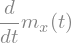

In [253]:
#Taking derivative of the function

m_x(t).diff(t) #similarly for m_y(t) and m_z(t)

In [254]:
#Creating a differntial equation

diff_eqn_1=smp.Eq(m_x(t).diff(t),gamma*(m_y(t)*B_0+m_z(t)*B_0))
diff_eqn_2=smp.Eq(m_y(t).diff(t),-gamma*(m_x(t)*B_0-m_z(t)*B_0))
diff_eqn_3=smp.Eq(m_z(t).diff(t),gamma*(-m_x(t)*B_0-m_y(t)*B_0))

#diff_eqn_1.lhs
#diff_eqn_1.rhs

In [255]:
system=[diff_eqn_1,diff_eqn_2,diff_eqn_3]

In [256]:
#solving with initial condition

ics={m_x(0):0,m_y(0):0,m_z(0):1}

In [257]:
#Method_1:

sol_1=smp.dsolve(system,[m_x(t),m_y(t),m_z(t)],ics=ics) #analytical solution of m

In [258]:
sol_1[0] #x component of m
sol_1[1] #y component of m
sol_1[2]; #z component of m , semicolon stops printing the end line,if you remove this then it will print sol_1[2] 

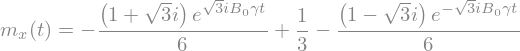

In [259]:
sol_1[0]

In [260]:
m_x=sol_1[0].subs([(B_0,1),(gamma,1)]) 
m_y=sol_1[1].subs([(B_0,1),(gamma,1)])
m_z=sol_1[2].subs([(B_0,1),(gamma,1)])

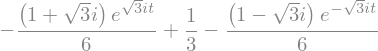

In [261]:
m_x.rhs

In [262]:
#coverting analytical solution to numerical values using lamdify funtion

f_x=smp.lambdify(t,m_x.rhs)
f_y=smp.lambdify(t,m_y.rhs)
f_z=smp.lambdify(t,m_z.rhs)

In [263]:
from sympy import lambdify
t=np.linspace(1,10,100) # time for which we are looking for the solution

In [264]:
f_x(t) #m_x, x component of m
f_y(t) #m_y, y component of m
f_z(t) #m_z, z component of m
; #semicolon hides printing the cell

'#semicolon hides printing the cell'

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(3.6, 1.04, 'Analytical solution of m')

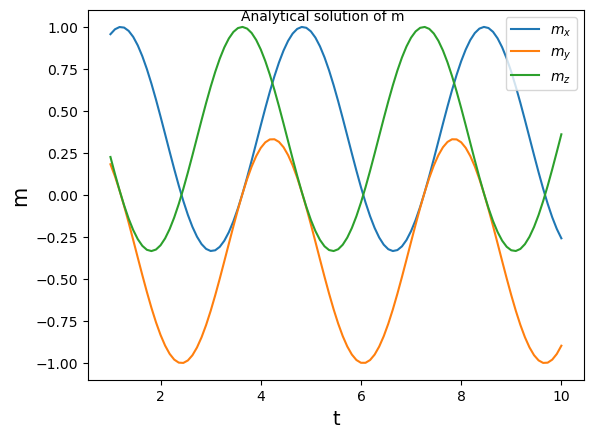

In [265]:
plt.plot(t,f_x(t),label=r"$m_x$")
plt.plot(t,f_y(t),label=r"$m_y$")
plt.plot(t,f_z(t),label=r"$m_z$")
plt.legend(loc="best")
plt.xlabel("t", fontsize=14)
plt.ylabel("m",fontsize=15)
plt.text(3.6,1.04,"Analytical solution of m")

In [266]:
#Method_2: This method also give you the solution for m
#eqs=[Eq(m_x(t).diff(t),gamma*(m_y(t)*B_0+m_z(t)*B_0)),Eq(m_y(t).diff(t),-gamma*(m_x(t)*B_0-m_z(t)*B_0)),Eq(m_z(t).diff(t),gamma*(-m_x(t)*B_0-m_y(t)*B_0))]
#sol_2=smp.dsolve_system(eqs,ics=ics)
#m_x=sol_2[0][0]
#m_y=sol_2[0][1]
#m_z=sol_2[0][2]

# Numerical Approach: using Numpy


We have three coupled differential equations:

$$\frac{dm_x(t)}{dt}=\gamma\left[m_{y}(t)B_0+m_z(t)B_0\right]\tag{2}$$
$$\frac{dm_y(t)}{dt}=-\gamma\left[m_{x}(t)B_0-m_z(t)B_0\right]\tag{3}$$
$$\frac{dm_z(t)}{dt}=\gamma\left[-m_{x}(t)B_0-m_y(t)B_0\right]\tag{4}$$

In [267]:
#Solution using solve_ivp routine

def dmdt(t,m):           # t is the time, and m contains m_x,m_y,m_z component
    
    gamma=1 #Gyromagnetic ratio
    B_0=1   #constant magnetic field in z direction
    
    m_x=m[0] 
    m_y=m[1]
    m_z=m[2]
    
    # Solving component wise simultaneouly
    
    dm_xdt =gamma*B_0*(m_y+m_z)
    dm_ydt =-gamma*B_0*(m_x-m_z)
    dm_zdt =gamma*B_0*(-m_x-m_y)
    
    return [dm_xdt,dm_ydt,dm_zdt]  #returning the m vector

 
''' Initial conditions: m(0)=[0,0,m_0]'''

m0=[0,0,1]
    
# solving the differential equations

#t=np.linspace(0, 10, 101)#times interval we are looking for the solution,alreday defined above no need to call again 

sol=solve_ivp(dmdt, t_span=(0, 10), y0=m0, t_eval=t, rtol=1e-6, atol=1e-6) #integrating over time will give m


In [268]:
m_x=sol.y[0]   
m_y=sol.y[1]
m_z=sol.y[2]

# Note:
function in solve_ivp defined as dy / dt = f(t, y) so we have to take .y of the sol although we defined our odes as $dmdt= f(t,y)$
here y is m by definition of solve_ivp package.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

Text(3.6, 1.04, 'Numerical solution of m')

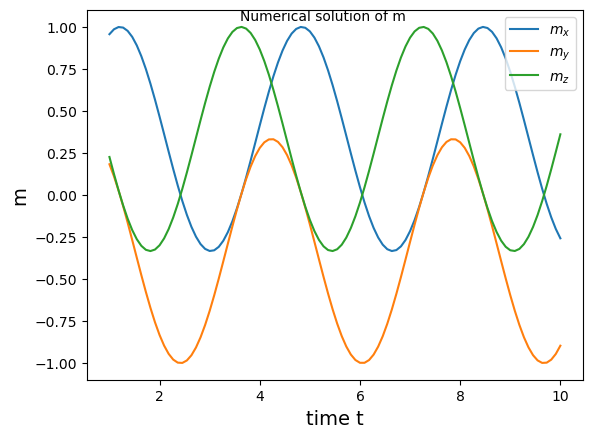

In [269]:
plt.plot(t,m_x,label=r"$m_x$")
plt.plot(t,m_y,label=r"$m_y$")
plt.plot(t,m_z,label=r"$m_z$")
plt.xlabel(r"time t", fontsize=14)
plt.ylabel(r"m", fontsize=14)
plt.legend(loc="best")
plt.text(3.6,1.04,"Numerical solution of m")

# Note

function in odeint defined as dy / dt = f(y,t) , differnt than solve_ivp function: position of t and y interchanged.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [270]:
#solution using odeint routine

def dmdt(m,t):           # t is the time, and m contains m_x,m_y,m_z component
    
    gamma=1 #gyromagnetic ratio
    B_0=1   #constant magnetic field
    
    m_x=m[0] 
    m_y=m[1]
    m_z=m[2]
    
    
    # three coupled differential equations 
    # Solving component wise simultaneouly
    
    dm_xdt =gamma*B_0*(m_y+m_z)
    dm_ydt =-gamma*B_0*(m_x-m_z)
    dm_zdt =gamma*B_0*(-m_x-m_y)
    
    return [dm_xdt,dm_ydt,dm_zdt]  #returning the m vector

 
''' Initial conditions: m(0)=[0,0,m_0]'''

m0=[0,0,1]
    
# solving the differential equations

#t = np.linspace(0, 10, 101) #time interval we are looking for the solution, already defined above no need call again 

m=odeint(dmdt,m0,t) #integrating over time will give m

# solutions:
m_x=m[:,0]
m_y=m[:,1]
m_z=m[:,2]


Text(3.6, 1.04, 'Numerical solution of m')

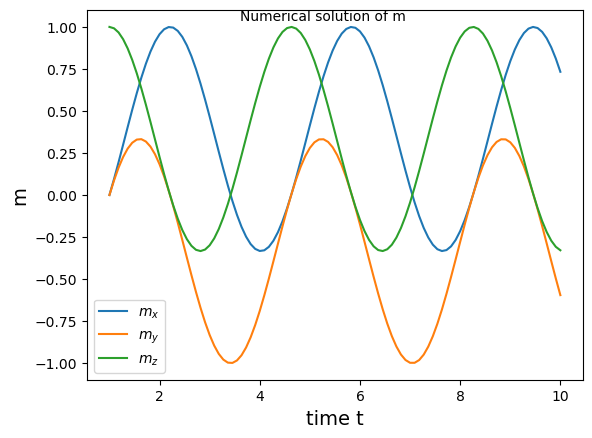

In [271]:
plt.plot(t,m_x,label=r"$m_x$")
plt.plot(t,m_y,label=r"$m_y$")
plt.plot(t,m_z,label=r"$m_z$")
plt.xlabel(r"time t", fontsize=14)
plt.ylabel(r"m", fontsize=14)
plt.legend(loc="best")
plt.text(3.6,1.04,"Numerical solution of m")

This problem is solved for time independent constant magnetic field $B$, we have seen analytical and numerical solution is in good agrement. One can also solve this system for time dependent magnetic field $B(t)$, then the only difference one would expect in the cross product term defind above will have dependent values but rest of the formalism is going to be the same.